In [111]:
import pandas as pd
import re
import csv
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

Reading data

In [112]:
#scraped data
df1=pd.read_csv('reviews_data.csv')
df2=pd.read_csv('reviews_data2.csv')
df3=pd.read_csv('reviews_data3.csv')
df4=pd.read_csv('reviews_data4.csv')
df5=pd.read_csv('reviews_data5.csv')
#the given imdb data
df_imdb=pd.read_excel('awards_until2019_imdbid.xlsx')

#### Facts about the scraped data 

In [113]:
print('df1 has', len(df1), 'reviews with', len(df1['movie_id'].unique()), 'movies')
print('df2 has', len(df2), 'reviews with', len(df2['movie_id'].unique()), 'movies')
print('df3 has', len(df3), 'reviews with', len(df3['movie_id'].unique()), 'movies')
print('df4 has', len(df4), 'reviews with', len(df4['movie_id'].unique()), 'movies')
print('df5 has', len(df5), 'reviews with', len(df5['movie_id'].unique()), 'movies')
print('#-------#')
print('The goal was to scrape reviews for a total number of movies equal to :', len(df_imdb['imdbid']))
print('A total of',len(df1)+len(df2)+len(df3)+len(df4)+len(df5), 'reviews were scraped for the 664 movies with 3 inconsistent movie_ids')

df1 has 34665 reviews with 117 movies
df2 has 19477 reviews with 36 movies
df3 has 7448 reviews with 12 movies
df4 has 61223 reviews with 118 movies
df5 has 190409 reviews with 381 movies
#-------#
The goal was to scrape reviews for a total number of movies equal to : 667
A total of 313222 reviews were scraped for the 664 movies with 3 inconsistent movie_ids


In [114]:
#Merging all dfs
df=pd.concat([df1,df2,df3,df4,df5], axis=0)
print('The merged df has a shape of ', df.shape)

The merged df has a shape of  (313222, 9)


#### Display all scraped data (merged) 

In [115]:
df


,movie_id,movie_name,title,link,date,rating,reviewer_name,reviewer_link,review_content
0,tt0113627,Leaving Las Vegas,The dignity of love and the depths of despair,https://www.imdb.com/review/rw1093906/?ref_=tt...,2005-06-03,9,mstomaso,https://www.imdb.com/user/ur3824745/?ref_=tt_urv,"If Mike Figgis never made another film, and Ni..."
1,tt0113627,Leaving Las Vegas,The chemistry between Cage and Shue is sizzlin...,https://www.imdb.com/review/rw0366260/?ref_=tt...,2002-06-27,10,Nazi_Fighter_David,https://www.imdb.com/user/ur0176092/?ref_=tt_urv,Mike Figgis directed beautifully 'Leaving Las ...
2,tt0113627,Leaving Las Vegas,Unconditional love in an alcoholic haze.,https://www.imdb.com/review/rw2082321/?ref_=tt...,2009-06-17,8,hitchcockthelegend,https://www.imdb.com/user/ur16161013/?ref_=tt_urv,"Ben Sanderson is an alcoholic, who after getti..."
3,tt0113627,Leaving Las Vegas,"Or, is killing myself a way of drinking?",https://www.imdb.com/review/rw1013060/?ref_=tt...,2005-02-03,10,film-critic,https://www.imdb.com/user/ur1601212/?ref_=tt_urv,"To me, this is one of the best romantic films ..."
4,tt0113627,Leaving Las Vegas,"Amazing, and gritty performances",https://www.imdb.com/review/rw0366280/?ref_=tt...,2003-05-03,9,jguz58,https://www.imdb.com/user/ur0702821/?ref_=tt_urv,It's not a movie I could bear to watch very of...
...,...,...,...,...,...,...,...,...,...
190404,tt6053438,Sur le chemin de la rédemption,A terrible movie,https://www.imdb.com/review/rw4304637/?ref_=tt...,2018-08-26,1,maxwell-58088,https://www.imdb.com/user/ur91662753/?ref_=tt_urv,I thought this would be a good movie based on ...
190405,tt6053438,Sur le chemin de la rédemption,First Reformed,https://www.imdb.com/review/rw6491180/?ref_=tt...,2021-01-17,10,mrls-05315,https://www.imdb.com/user/ur61987197/?ref_=tt_urv,"I couldn't help comparing this movie to ""Winte..."
190406,tt6053438,Sur le chemin de la rédemption,Less Taxi Driver and more The Believer with be...,https://www.imdb.com/review/rw8629961/?ref_=tt...,2022-10-23,8,trey-89891,https://www.imdb.com/user/ur63444148/?ref_=tt_urv,Perfect performances and truly engaging direct...
190407,tt6053438,Sur le chemin de la rédemption,Just terrible,https://www.imdb.com/review/rw4512751/?ref_=tt...,2018-12-15,2,lachlankennedy,https://www.imdb.com/user/ur96402918/?ref_=tt_urv,I'll give the movie points for the tension cre...


## Processing the given df_imdb

#### Displaying df_imdb

In [116]:
df_imdb

,year,movie_title,imdbid,date_nomination,date_award,nom_actor,nom_actress,nom_anime,nom_foreign,nom_direct,...,award_actor,award_actress,award_anime,award_foreign,award_direct,award_doc,award_pict,award_screen,tot_award,total
0,1995,Leaving Las Vegas,tt0113627,1996-02-13,1996-03-25,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,8.0
1,1995,Mr. Holland's Opus,tt0113862,1996-02-13,1996-03-25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,1995,Nixon,tt0113987,1996-02-13,1996-03-25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,1995,Dead Man Walking,tt0112818,1996-02-13,1996-03-25,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,NaN
4,1995,The Postman (Il Postino),tt0110877,1996-02-13,1996-03-25,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2018,RBG,tt7689964,2019-01-22,2019-02-24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
663,2018,Black Panther,tt1825683,2019-01-22,2019-02-24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
664,2018,The Ballad of Buster Scruggs,tt6412452,2019-01-22,2019-02-24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
665,2018,If Beale Street Could Talk,tt7125860,2019-01-22,2019-02-24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


#### Displaying possible variables having Nan values in df_imdb

In [117]:
df_imdb.isnull().any()

year               False
movie_title        False
imdbid             False
date_nomination    False
date_award         False
nom_actor          False
nom_actress        False
nom_anime          False
nom_foreign        False
nom_direct         False
nom_doc             True
nom_pict           False
nom_screen         False
tot_nom            False
award_actor        False
award_actress      False
award_anime        False
award_foreign      False
award_direct       False
award_doc          False
award_pict         False
award_screen       False
tot_award          False
total               True
dtype: bool

#### Checking null values rate of 'nom_doc' variable

In [118]:
#sum
_nom_doc_nan_count = df_imdb['nom_doc'].isna().sum()
#mean or rate
_nom_doc_nan_rate = df_imdb['nom_doc'].isna().mean()
print("nom_doc NaN count:", _nom_doc_nan_count)
print("nom_doc NaN rate:", _nom_doc_nan_rate)
print('here we will see if the respective movie has already an another nomination or award')
nom_doc_isna=df_imdb[df_imdb['nom_doc'].isna()]
# Variables starting with 'nom'
nom_variables = nom_doc_isna.filter(regex=r'^nom')

# Variables starting with 'award'
award_variables = nom_doc_isna.filter(regex=r'^award')

# Display the variables
print("Variables starting with 'nom':")
print(nom_variables)

print("Variables starting with 'award':")
print(award_variables)
print(nom_doc_isna.filter(regex=r'^tot'))
#---
print('So it already has an another nomination, we can just replace NaN with 0 as also tot=4')
df_imdb['nom_doc'] = df_imdb['nom_doc'].fillna(0)

nom_doc NaN count: 1
nom_doc NaN rate: 0.0014992503748125937
here we will see if the respective movie has already an another nomination or award
Variables starting with 'nom':
    nom_actor  nom_actress  nom_anime  nom_foreign  nom_direct  nom_doc  \
96          1            0          0            0           1      NaN   

    nom_pict  nom_screen  
96         1           1  
Variables starting with 'award':
    award_actor  award_actress  award_anime  award_foreign  award_direct  \
96            0              0            0              0             0   

    award_doc  award_pict  award_screen  
96          0           0             0  
    tot_nom  tot_award  total
96        4          0    8.0
So it already has an another nomination, we can just replace NaN with 0 as also tot=4


#### Checking null values rate of 'total' variable

In [119]:
_nom_doc_nan_count = df_imdb['total'].isna().sum()
_nom_doc_nan_rate = df_imdb['total'].isna().mean()
print("nom_doc NaN count:", _nom_doc_nan_count)
print("nom_doc NaN rate:", _nom_doc_nan_rate)
print('#-----------#')
print('total variable have no signification as we have a variable "total_nom" and total_award in axis')
df_imdb.drop(columns=['total'],inplace=True)
print('total is dropped')

nom_doc NaN count: 647
nom_doc NaN rate: 0.9700149925037481
#-----------#
total variable have no signification as we have a variable "total_nom" and total_award in axis
total is dropped


In [120]:
df_imdb.isna().any()

year               False
movie_title        False
imdbid             False
date_nomination    False
date_award         False
nom_actor          False
nom_actress        False
nom_anime          False
nom_foreign        False
nom_direct         False
nom_doc            False
nom_pict           False
nom_screen         False
tot_nom            False
award_actor        False
award_actress      False
award_anime        False
award_foreign      False
award_direct       False
award_doc          False
award_pict         False
award_screen       False
tot_award          False
dtype: bool

No longer Nan values in imdb

### Let's now work on the scraped data (containing reviews)

#### Checking movies_ids for which no reviews were scraped

In [121]:
not_found_ids=[x for x in df_imdb['imdbid'] if x not in df['movie_id'].unique()]
print(not_found_ids)

['tt0113254', 'tt0240885', 'ttxxxxxxxx']


Let's try these to access the web pages of these missing movies in our scraped dataframe and check whether they are really inconsistent

In [122]:
base_url = 'https://www.imdb.com'
for x  in not_found_ids : 
    url = f"{base_url}/title/{x}/reviews"
    print(url)

https://www.imdb.com/title/tt0113254/reviews
https://www.imdb.com/title/tt0240885/reviews
https://www.imdb.com/title/ttxxxxxxxx/reviews


'tt0113254' has one review, so our algorithm didn't manage to capture it, but anyway with 1 reviews we won't draw any conclusion regarding our research question.
'tt0240885' doesn't seem to have any review.
'ttxxxxxxx' is a wrong movie_id and its webpage is not found.

In [123]:
df['movie_name'].unique()

array(['Leaving Las Vegas', 'Professeur Holland', 'Nixon',
       'La dernière marche', 'Le facteur', 'Casino',
       'Sur la route de Madison', 'Raison et sentiments',
       'Babe, le cochon devenu berger', 'Braveheart',
       'Anne Frank Remembered', 'The Battle Over Citizen Kane',
       'Small Wonders', 'Troublesome Creek: A Midwestern',
       'La beauté des choses', 'Antonia et ses filles',
       'Poussières de vie', 'O Quatrilho', 'Marchand de rêves',
       'Apollo 13', 'Maudite Aphrodite', 'Toy Story', 'Usual Suspects',
       'Jerry Maguire', 'Le patient anglais', 'Shine', 'Sling Blade',
       'Secrets et Mensonges', 'Simples secrets', 'Fargo',
       'Breaking the Waves',
       'Les mille et une recettes du cuisinier amoureux', 'Kolja',
       'Søndagsengler', 'Le prisonnier du Caucase', 'Ridicule',
       'Larry Flynt', 'The Line King: The Al Hirschfeld Story', 'Mandela',
       'Suzanne Farrell: Elusive Muse',
       'Tell the Truth and Run: George Seldes and the Ame

#### Checking for null values

In [124]:
df.isnull().any()

movie_id          False
movie_name        False
title              True
link              False
date              False
rating            False
reviewer_name     False
reviewer_link     False
review_content    False
dtype: bool

Checking Nan values of the variable 'title' (it's the title of the given review )

In [125]:
Reviews_with_missing_titles=df[df['title'].isnull()]['link']
print(Reviews_with_missing_titles)

2410     https://www.imdb.com/review/rw0461697/?ref_=tt...
14818    https://www.imdb.com/review/rw2919747/?ref_=tt...
33639    https://www.imdb.com/review/rw8858219/?ref_=tt...
88519    https://www.imdb.com/review/rw3851405/?ref_=tt...
Name: link, dtype: object


It appears that these reviews were really without titles and it wasn't an error produced by the algorithm, so we will just replace Nan by 'no title'

In [126]:
df['title']=df['title'].fillna('no title')

#### Checking possible inaccessible movies_names

In [127]:
movies_with_missing_titles=df[df['movie_name']=='Nan']['movie_id']
print(movies_with_missing_titles)

Series([], Name: movie_id, dtype: object)


For notice, in scraping code, when error is produced by the process of movie_name scraping 'Nan' is attributed to movie_name variable. Here all movies_names were accessible

## Data visualisation

 Top 10 movies with the highest number of reviews

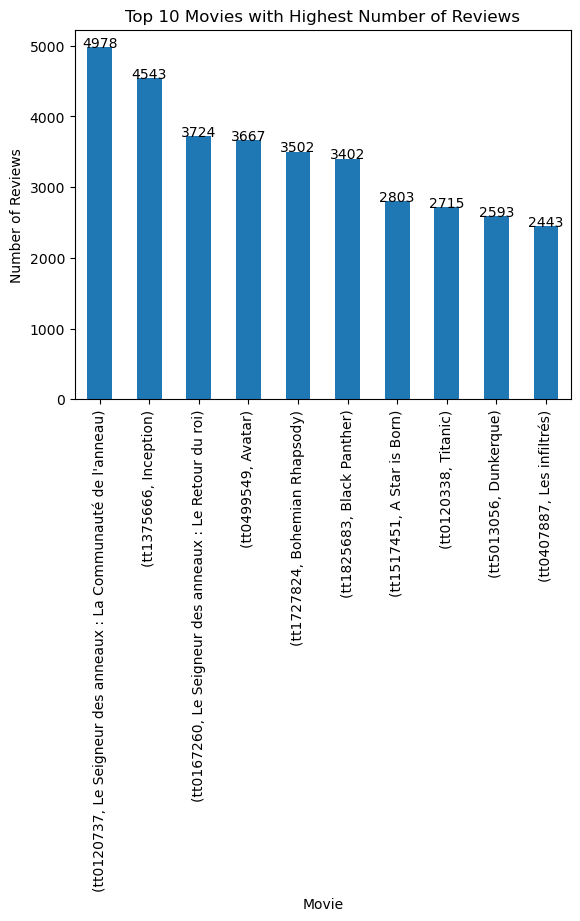

In [128]:
top_10_reviews = df.groupby(['movie_id', 'movie_name'])['review_content'].count().nlargest(10)
ax = top_10_reviews.plot(kind='bar', xlabel='Movie', ylabel='Number of Reviews', title='Top 10 Movies with Highest Number of Reviews')

# Add value labels above each bar
for i, v in enumerate(top_10_reviews):
    ax.text(i, v + 1, str(v), ha='center')

plt.show()

10 Movies with lowest number of reviews

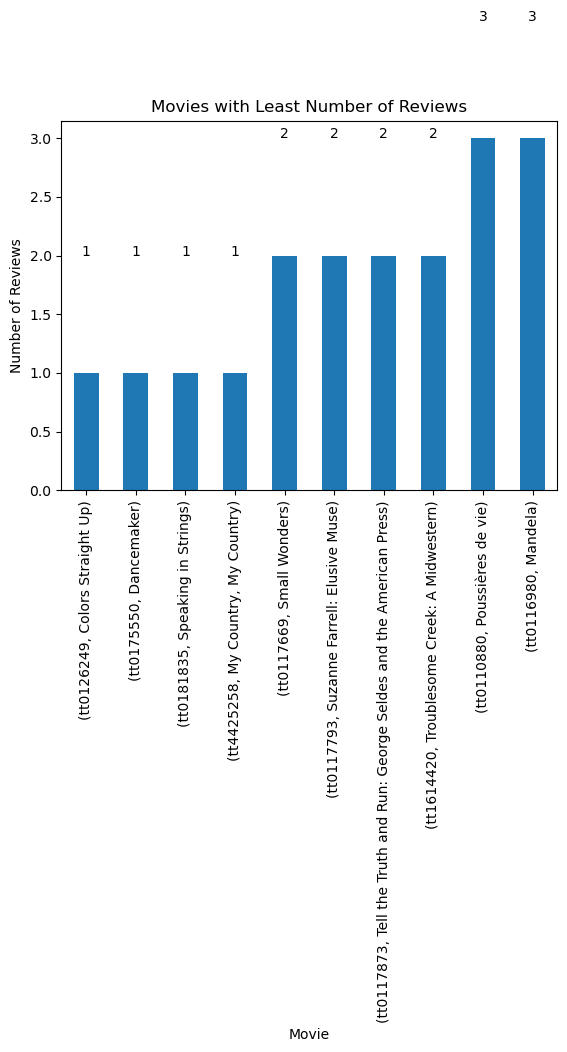

In [129]:
least_reviews = df.groupby(['movie_id', 'movie_name'])['review_content'].count().nsmallest(10)
ax = least_reviews.plot(kind='bar', xlabel='Movie', ylabel='Number of Reviews', title='Movies with Least Number of Reviews')

# Add value labels above each bar
for i, v in enumerate(least_reviews):
    ax.text(i, v + 1, str(v), ha='center')

plt.show()

10 Movies with the best average rating

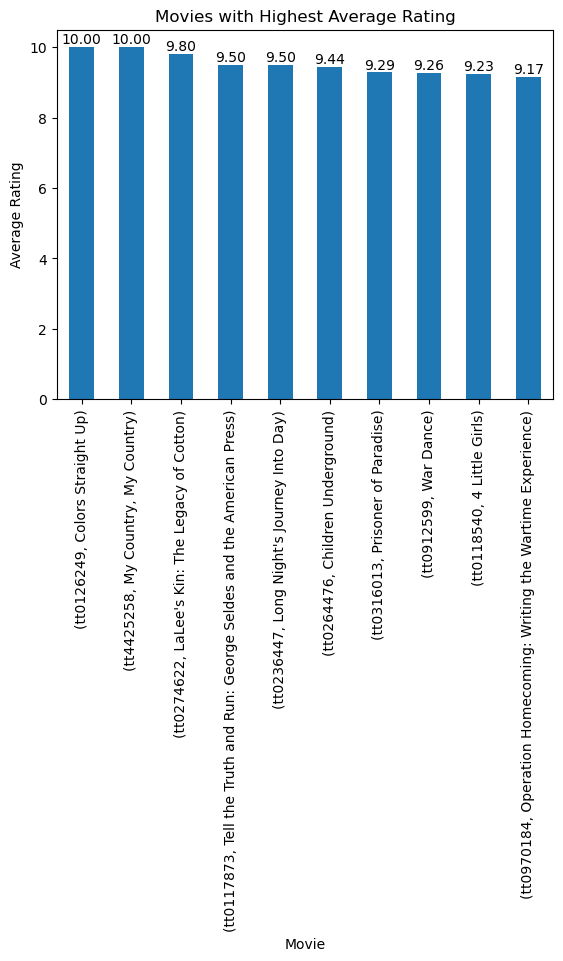

In [130]:
top_avg_rating = df.groupby(['movie_id', 'movie_name'])['rating'].mean().nlargest(10)
ax = top_avg_rating.plot(kind='bar', xlabel='Movie', ylabel='Average Rating', title='Movies with Highest Average Rating')

# Add value labels above each bar
for i, v in enumerate(top_avg_rating):
    ax.text(i, v + 0.1, f"{v:.2f}", ha='center')

plt.show()

10 Movies with the worst average rating

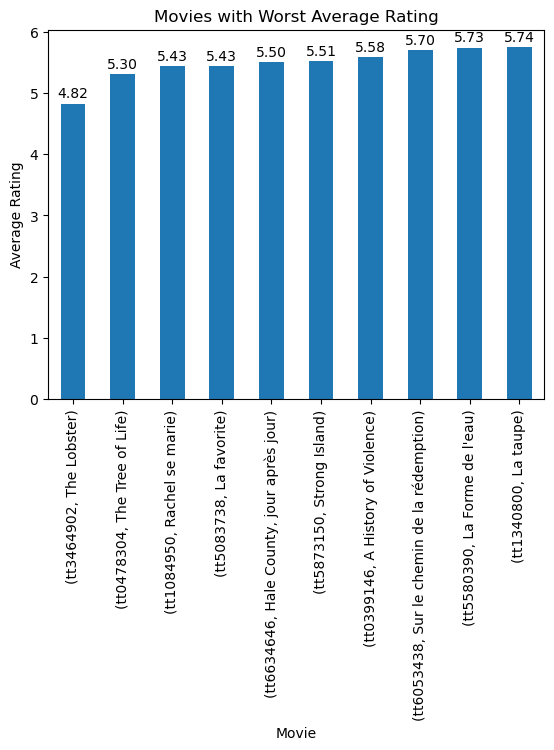

In [131]:
# 
worst_avg_rating = df.groupby(['movie_id', 'movie_name'])['rating'].mean().nsmallest(10)
ax = worst_avg_rating.plot(kind='bar', xlabel='Movie', ylabel='Average Rating', title='Movies with Worst Average Rating')

# Add value labels above each bar
for i, v in enumerate(worst_avg_rating):
    ax.text(i, v + 0.1, f"{v:.2f}", ha='center')

plt.show()

Saving Dataframe before merging with imdb_data

In [132]:
df.to_csv('Reviews_dataframe.csv')

#### Joining with imdb_data and extracting final dataframe

In [133]:
merged_df = df.merge(df_imdb, left_on='movie_id', right_on='imdbid')
merged_df

,movie_id,movie_name,title,link,date,rating,reviewer_name,reviewer_link,review_content,year,...,tot_nom,award_actor,award_actress,award_anime,award_foreign,award_direct,award_doc,award_pict,award_screen,tot_award
0,tt0113627,Leaving Las Vegas,The dignity of love and the depths of despair,https://www.imdb.com/review/rw1093906/?ref_=tt...,2005-06-03,9,mstomaso,https://www.imdb.com/user/ur3824745/?ref_=tt_urv,"If Mike Figgis never made another film, and Ni...",1995,...,3,1,0,0,0,0,0,0,0,1
1,tt0113627,Leaving Las Vegas,The chemistry between Cage and Shue is sizzlin...,https://www.imdb.com/review/rw0366260/?ref_=tt...,2002-06-27,10,Nazi_Fighter_David,https://www.imdb.com/user/ur0176092/?ref_=tt_urv,Mike Figgis directed beautifully 'Leaving Las ...,1995,...,3,1,0,0,0,0,0,0,0,1
2,tt0113627,Leaving Las Vegas,Unconditional love in an alcoholic haze.,https://www.imdb.com/review/rw2082321/?ref_=tt...,2009-06-17,8,hitchcockthelegend,https://www.imdb.com/user/ur16161013/?ref_=tt_urv,"Ben Sanderson is an alcoholic, who after getti...",1995,...,3,1,0,0,0,0,0,0,0,1
3,tt0113627,Leaving Las Vegas,"Or, is killing myself a way of drinking?",https://www.imdb.com/review/rw1013060/?ref_=tt...,2005-02-03,10,film-critic,https://www.imdb.com/user/ur1601212/?ref_=tt_urv,"To me, this is one of the best romantic films ...",1995,...,3,1,0,0,0,0,0,0,0,1
4,tt0113627,Leaving Las Vegas,"Amazing, and gritty performances",https://www.imdb.com/review/rw0366280/?ref_=tt...,2003-05-03,9,jguz58,https://www.imdb.com/user/ur0702821/?ref_=tt_urv,It's not a movie I could bear to watch very of...,1995,...,3,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313217,tt6053438,Sur le chemin de la rédemption,A terrible movie,https://www.imdb.com/review/rw4304637/?ref_=tt...,2018-08-26,1,maxwell-58088,https://www.imdb.com/user/ur91662753/?ref_=tt_urv,I thought this would be a good movie based on ...,2018,...,1,0,0,0,0,0,0,0,0,0
313218,tt6053438,Sur le chemin de la rédemption,First Reformed,https://www.imdb.com/review/rw6491180/?ref_=tt...,2021-01-17,10,mrls-05315,https://www.imdb.com/user/ur61987197/?ref_=tt_urv,"I couldn't help comparing this movie to ""Winte...",2018,...,1,0,0,0,0,0,0,0,0,0
313219,tt6053438,Sur le chemin de la rédemption,Less Taxi Driver and more The Believer with be...,https://www.imdb.com/review/rw8629961/?ref_=tt...,2022-10-23,8,trey-89891,https://www.imdb.com/user/ur63444148/?ref_=tt_urv,Perfect performances and truly engaging direct...,2018,...,1,0,0,0,0,0,0,0,0,0
313220,tt6053438,Sur le chemin de la rédemption,Just terrible,https://www.imdb.com/review/rw4512751/?ref_=tt...,2018-12-15,2,lachlankennedy,https://www.imdb.com/user/ur96402918/?ref_=tt_urv,I'll give the movie points for the tension cre...,2018,...,1,0,0,0,0,0,0,0,0,0


In [134]:
merged_df.columns

Index(['movie_id', 'movie_name', 'title', 'link', 'date', 'rating',
       'reviewer_name', 'reviewer_link', 'review_content', 'year',
       'movie_title', 'imdbid', 'date_nomination', 'date_award', 'nom_actor',
       'nom_actress', 'nom_anime', 'nom_foreign', 'nom_direct', 'nom_doc',
       'nom_pict', 'nom_screen', 'tot_nom', 'award_actor', 'award_actress',
       'award_anime', 'award_foreign', 'award_direct', 'award_doc',
       'award_pict', 'award_screen', 'tot_award'],
      dtype='object')

#### Renaming some columns

In [135]:
merged_df.drop(columns=['movie_title','imdbid'],inplace=True)
merged_df.rename(columns={'link':'review_link','title':'reviews_title','date':'review_date','year':'production_year'},inplace=True)
merged_df

,movie_id,movie_name,reviews_title,review_link,review_date,rating,reviewer_name,reviewer_link,review_content,production_year,...,tot_nom,award_actor,award_actress,award_anime,award_foreign,award_direct,award_doc,award_pict,award_screen,tot_award
0,tt0113627,Leaving Las Vegas,The dignity of love and the depths of despair,https://www.imdb.com/review/rw1093906/?ref_=tt...,2005-06-03,9,mstomaso,https://www.imdb.com/user/ur3824745/?ref_=tt_urv,"If Mike Figgis never made another film, and Ni...",1995,...,3,1,0,0,0,0,0,0,0,1
1,tt0113627,Leaving Las Vegas,The chemistry between Cage and Shue is sizzlin...,https://www.imdb.com/review/rw0366260/?ref_=tt...,2002-06-27,10,Nazi_Fighter_David,https://www.imdb.com/user/ur0176092/?ref_=tt_urv,Mike Figgis directed beautifully 'Leaving Las ...,1995,...,3,1,0,0,0,0,0,0,0,1
2,tt0113627,Leaving Las Vegas,Unconditional love in an alcoholic haze.,https://www.imdb.com/review/rw2082321/?ref_=tt...,2009-06-17,8,hitchcockthelegend,https://www.imdb.com/user/ur16161013/?ref_=tt_urv,"Ben Sanderson is an alcoholic, who after getti...",1995,...,3,1,0,0,0,0,0,0,0,1
3,tt0113627,Leaving Las Vegas,"Or, is killing myself a way of drinking?",https://www.imdb.com/review/rw1013060/?ref_=tt...,2005-02-03,10,film-critic,https://www.imdb.com/user/ur1601212/?ref_=tt_urv,"To me, this is one of the best romantic films ...",1995,...,3,1,0,0,0,0,0,0,0,1
4,tt0113627,Leaving Las Vegas,"Amazing, and gritty performances",https://www.imdb.com/review/rw0366280/?ref_=tt...,2003-05-03,9,jguz58,https://www.imdb.com/user/ur0702821/?ref_=tt_urv,It's not a movie I could bear to watch very of...,1995,...,3,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313217,tt6053438,Sur le chemin de la rédemption,A terrible movie,https://www.imdb.com/review/rw4304637/?ref_=tt...,2018-08-26,1,maxwell-58088,https://www.imdb.com/user/ur91662753/?ref_=tt_urv,I thought this would be a good movie based on ...,2018,...,1,0,0,0,0,0,0,0,0,0
313218,tt6053438,Sur le chemin de la rédemption,First Reformed,https://www.imdb.com/review/rw6491180/?ref_=tt...,2021-01-17,10,mrls-05315,https://www.imdb.com/user/ur61987197/?ref_=tt_urv,"I couldn't help comparing this movie to ""Winte...",2018,...,1,0,0,0,0,0,0,0,0,0
313219,tt6053438,Sur le chemin de la rédemption,Less Taxi Driver and more The Believer with be...,https://www.imdb.com/review/rw8629961/?ref_=tt...,2022-10-23,8,trey-89891,https://www.imdb.com/user/ur63444148/?ref_=tt_urv,Perfect performances and truly engaging direct...,2018,...,1,0,0,0,0,0,0,0,0,0
313220,tt6053438,Sur le chemin de la rédemption,Just terrible,https://www.imdb.com/review/rw4512751/?ref_=tt...,2018-12-15,2,lachlankennedy,https://www.imdb.com/user/ur96402918/?ref_=tt_urv,I'll give the movie points for the tension cre...,2018,...,1,0,0,0,0,0,0,0,0,0


In [136]:
merged_df.shape

(313222, 30)

### Exploring more information about reviewers 

Function to extract a unique id for reviewers (from url)

In [137]:
def extract_id(url):
    # Extract the ID using regular expression
    pattern = r'user/(\w+)/' 
    match = re.search(pattern, url)
    if match:
        user_id = match.group(1)
    else: 
        user_id=None
    return(user_id)
    
merged_df['reviewer_id']=merged_df['reviewer_link'].apply(lambda x: extract_id(x))

In [138]:
# Calculate average rating and number of movies reviewed per reviewer
average_rating = merged_df.groupby('reviewer_id')['rating'].mean()
movies_reviewed = merged_df.groupby('reviewer_id').size()

# Add new columns to the DataFrame
merged_df['average_rating'] = round(merged_df['reviewer_id'].map(average_rating),2)
merged_df['number_movies_reviewed'] = merged_df['reviewer_id'].map(movies_reviewed)

In [139]:
merged_df

,movie_id,movie_name,reviews_title,review_link,review_date,rating,reviewer_name,reviewer_link,review_content,production_year,...,award_anime,award_foreign,award_direct,award_doc,award_pict,award_screen,tot_award,reviewer_id,average_rating,number_movies_reviewed
0,tt0113627,Leaving Las Vegas,The dignity of love and the depths of despair,https://www.imdb.com/review/rw1093906/?ref_=tt...,2005-06-03,9,mstomaso,https://www.imdb.com/user/ur3824745/?ref_=tt_urv,"If Mike Figgis never made another film, and Ni...",1995,...,0,0,0,0,0,0,1,ur3824745,8.58,36
1,tt0113627,Leaving Las Vegas,The chemistry between Cage and Shue is sizzlin...,https://www.imdb.com/review/rw0366260/?ref_=tt...,2002-06-27,10,Nazi_Fighter_David,https://www.imdb.com/user/ur0176092/?ref_=tt_urv,Mike Figgis directed beautifully 'Leaving Las ...,1995,...,0,0,0,0,0,0,1,ur0176092,8.59,29
2,tt0113627,Leaving Las Vegas,Unconditional love in an alcoholic haze.,https://www.imdb.com/review/rw2082321/?ref_=tt...,2009-06-17,8,hitchcockthelegend,https://www.imdb.com/user/ur16161013/?ref_=tt_urv,"Ben Sanderson is an alcoholic, who after getti...",1995,...,0,0,0,0,0,0,1,ur16161013,8.47,68
3,tt0113627,Leaving Las Vegas,"Or, is killing myself a way of drinking?",https://www.imdb.com/review/rw1013060/?ref_=tt...,2005-02-03,10,film-critic,https://www.imdb.com/user/ur1601212/?ref_=tt_urv,"To me, this is one of the best romantic films ...",1995,...,0,0,0,0,0,0,1,ur1601212,8.07,15
4,tt0113627,Leaving Las Vegas,"Amazing, and gritty performances",https://www.imdb.com/review/rw0366280/?ref_=tt...,2003-05-03,9,jguz58,https://www.imdb.com/user/ur0702821/?ref_=tt_urv,It's not a movie I could bear to watch very of...,1995,...,0,0,0,0,0,0,1,ur0702821,9.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313217,tt6053438,Sur le chemin de la rédemption,A terrible movie,https://www.imdb.com/review/rw4304637/?ref_=tt...,2018-08-26,1,maxwell-58088,https://www.imdb.com/user/ur91662753/?ref_=tt_urv,I thought this would be a good movie based on ...,2018,...,0,0,0,0,0,0,0,ur91662753,1.00,1
313218,tt6053438,Sur le chemin de la rédemption,First Reformed,https://www.imdb.com/review/rw6491180/?ref_=tt...,2021-01-17,10,mrls-05315,https://www.imdb.com/user/ur61987197/?ref_=tt_urv,"I couldn't help comparing this movie to ""Winte...",2018,...,0,0,0,0,0,0,0,ur61987197,10.00,1
313219,tt6053438,Sur le chemin de la rédemption,Less Taxi Driver and more The Believer with be...,https://www.imdb.com/review/rw8629961/?ref_=tt...,2022-10-23,8,trey-89891,https://www.imdb.com/user/ur63444148/?ref_=tt_urv,Perfect performances and truly engaging direct...,2018,...,0,0,0,0,0,0,0,ur63444148,8.00,1
313220,tt6053438,Sur le chemin de la rédemption,Just terrible,https://www.imdb.com/review/rw4512751/?ref_=tt...,2018-12-15,2,lachlankennedy,https://www.imdb.com/user/ur96402918/?ref_=tt_urv,I'll give the movie points for the tension cre...,2018,...,0,0,0,0,0,0,0,ur96402918,2.00,1


All columns in axis

In [141]:
merged_df.columns

Index(['movie_id', 'movie_name', 'reviews_title', 'review_link', 'review_date',
       'rating', 'reviewer_name', 'reviewer_link', 'review_content',
       'production_year', 'date_nomination', 'date_award', 'nom_actor',
       'nom_actress', 'nom_anime', 'nom_foreign', 'nom_direct', 'nom_doc',
       'nom_pict', 'nom_screen', 'tot_nom', 'award_actor', 'award_actress',
       'award_anime', 'award_foreign', 'award_direct', 'award_doc',
       'award_pict', 'award_screen', 'tot_award', 'reviewer_id',
       'average_rating', 'number_movies_reviewed'],
      dtype='object')

Possible Nan values ? (no for sure :))

In [142]:
merged_df.isna().any()

movie_id                  False
movie_name                False
reviews_title             False
review_link               False
review_date               False
rating                    False
reviewer_name             False
reviewer_link             False
review_content            False
production_year           False
date_nomination           False
date_award                False
nom_actor                 False
nom_actress               False
nom_anime                 False
nom_foreign               False
nom_direct                False
nom_doc                   False
nom_pict                  False
nom_screen                False
tot_nom                   False
award_actor               False
award_actress             False
award_anime               False
award_foreign             False
award_direct              False
award_doc                 False
award_pict                False
award_screen              False
tot_award                 False
reviewer_id               False
average_

Saving dataframe (let's go for NLP)

In [143]:
merged_df.to_csv('Dataframe after merging.csv')